## Linear regression

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

## Using scikit-learn

In [5]:
# the ages of people who wanna hire the health plan
axis_x = np.array([[18], [23], [28], [33], [38], [43], [48], [53],[58], [63]])
# price of health plan
axis_y = np.array([
    [871], [1132], [1042], [1356], 
    [1488], [1638], [1569], [1754], 
    [1866], [1900]
])

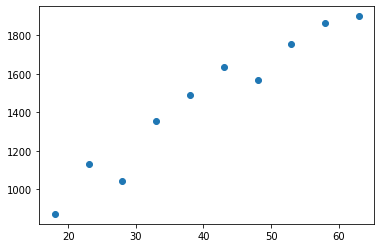

In [6]:
# plot a graph of ages by price plan
plt.scatter(axis_x, axis_y)

# If there is the tendence of values grow, can use the regression

In [7]:
regressor = LinearRegression()
# training the model
regressor.fit(axis_x, axis_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# coeficient b0, which intercept the axis x in some pont (is constant)
print('Coefficient b0:', regressor.intercept_)
# coefficient b1, inclination of the line in graph (variable accord the entries)
print('Coefficient b1', regressor.coef_)

Coefficient b0: [541.24363636]
Coefficient b1 [[22.72484848]]


In [9]:
# prevision type hardcode
prevision1 = regressor.intercept_ + regressor.coef_ * 40
print('Prediction of a health plan price for a person with 40th age(hardcode):', prevision1[0])
# prevision using the own sklearn
prevision2 = regressor.predict(np.array([[40]]))
print('Prediction of a health plan price for a person with 40th age(automated):', prevision2[0])

Prediction of a health plan price for a person with 40th age(hardcode): [1450.23757576]
Prediction of a health plan price for a person with 40th age(automated): [1450.23757576]


In [10]:
# prevision for multiple values
prevision_multi = regressor.predict(axis_x)
print('Predict for multi values: ', prevision_multi)

Predict for multi values:  [[ 950.29090909]
 [1063.91515152]
 [1177.53939394]
 [1291.16363636]
 [1404.78787879]
 [1518.41212121]
 [1632.03636364]
 [1745.66060606]
 [1859.28484848]
 [1972.90909091]]


In [11]:
# compare values predict with reals
print('Predicted values vs values reals')
results = abs(axis_y - prevision_multi)
print(results)
print('\n mean of erros (Errors up or down)')
# Check the efficiency of model, this model can wrong 70 for up or 70 for down
print(results.mean())

Predicted values vs values reals
[[ 79.29090909]
 [ 68.08484848]
 [135.53939394]
 [ 64.83636364]
 [ 83.21212121]
 [119.58787879]
 [ 63.03636364]
 [  8.33939394]
 [  6.71515152]
 [ 72.90909091]]

 mean of erros (Errors up or down)
70.15515151515152


In [12]:
# efficiency of model calculated by sklearn
# MSE and MAE
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(axis_y, prevision_multi)
mse = mean_squared_error(axis_y, prevision_multi)

print('Mean absolute error: ', mae)
# Give the value much greater than Mean absolute error, because it is elevated the square
# Penalize the biggest errors
print('Mean squred error: ', mse)

Mean absolute error:  70.15515151515152
Mean squred error:  6412.675151515151


Text(0, 0.5, 'Cost health plan')

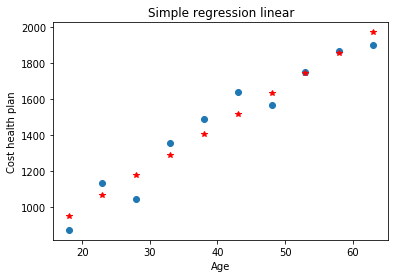

In [13]:
# Visualize the line in graph
plt.plot(axis_x, axis_y, 'o')
plt.plot(axis_x, prevision_multi, '*', color='red') 
plt.title('Simple regression linear')
plt.xlabel('Age')
plt.ylabel('Cost health plan')

Text(0, 0.5, 'Cost health plan')

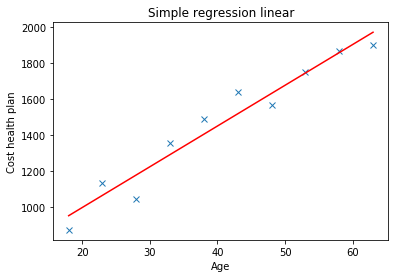

In [14]:
# graph with all the line
plt.plot(axis_x, axis_y, 'x')
plt.plot(axis_x, prevision_multi, color='red') 
plt.title('Simple regression linear')
plt.xlabel('Age')
plt.ylabel('Cost health plan')

## Using tensorflow

In [15]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.__version__

'2.1.0'

In [16]:
# scalar the attributes
from sklearn.preprocessing import StandardScaler

axis_x_2 = axis_x
axis_y_2 = axis_y

scaler_x = StandardScaler()
scaler_y = StandardScaler()
axis_x_2 = scaler_x.fit_transform(axis_x_2)
axis_y_2 = scaler_y.fit_transform(axis_y_2)

# values scalled
print(axis_x_2)
print(axis_y_2)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-1.75751985]
 [-0.98083058]
 [-1.24865447]
 [-0.31424669]
 [ 0.07856167]
 [ 0.52493481]
 [ 0.31960317]
 [ 0.87013004]
 [ 1.20342199]
 [ 1.3045999 ]]


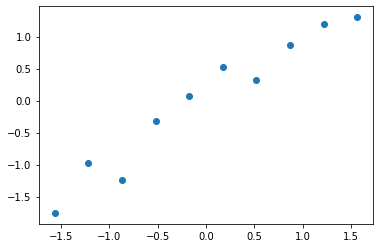

In [17]:
plt.scatter(axis_x_2, axis_y_2)

### Create the formula for simple regression linear, using in low level api
y = b0 + b1 * x

In [30]:
np.random.seed(0)
print(np.random.rand(2))

# Create the first coefficient
b0 = tf.Variable(0.54)
b1 = tf.Variable(0.71)

# calculate the error
error = tf.losses.mean_squared_error(axis_y_2, (b0 + b1 * axis_x_2))

# use decent of gradient
optimazer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
# Adjust the parameters (coefficient) untill find the minimum global
training = optimazer.minimize(error)

# initialize the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    # print(sess.run(b0))
    # print(sess.run(b1))
    for i in range(1000):
        sess.run(training)
    
    b0_final, b1_final = sess.run([b0, b1])
    print('Coefficients values updated')
    print(b0_final, b1_final)
    
previsions_tensor = b0_final + b1_final * axis_x_2
print('\n\n Previsions')
print(previsions_tensor)

prev_tensor_transform = scaler_y.inverse_transform(previsions_tensor)

[0.5488135  0.71518937]
Coefficients values updated
0.07293496 0.9359134


 Previsions
[[-1.39335951]
 [-1.06751629]
 [-0.74167308]
 [-0.41582986]
 [-0.08998665]
 [ 0.23585657]
 [ 0.56169979]
 [ 0.887543  ]
 [ 1.21338622]
 [ 1.53922944]]


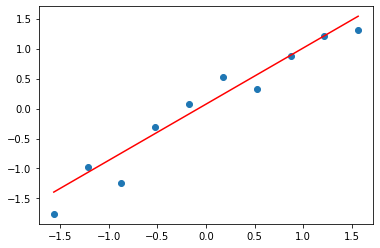

In [19]:
plt.plot(axis_x_2, axis_y_2, 'o')
plt.plot(axis_x_2, previsions_tensor, color='red')

In [20]:
# function to predict cost health plan
def predict_cost_health_plan(value):
    value_trans = [[ value ]]
    
    predict = scaler_y.inverse_transform(
        b0_final + b1_final * scaler_x.transform( value_trans )
    )
    
    return predict

In [21]:
# prevision for a people with age 40th
print(predict_cost_health_plan( 40 ))

[[1475.15949902]]


In [29]:
inverse_y_2 = scaler_y.inverse_transform(axis_y_2)
print(inverse_y_2)

[[ 871.]
 [1132.]
 [1042.]
 [1356.]
 [1488.]
 [1638.]
 [1569.]
 [1754.]
 [1866.]
 [1900.]]


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae1 = mean_absolute_error(inverse_y_2, prev_tensor_transform)
mse = mean_squared_error(inverse_y_2, prev_tensor_transform)

# MSE is better use for training, and MAE for verify the result final to compare result for up and down error
print('MSE and MAE => ', mse, ' and ', mae)

MSE and MAE =>  7153.912871448908  and  70.15515151515152
